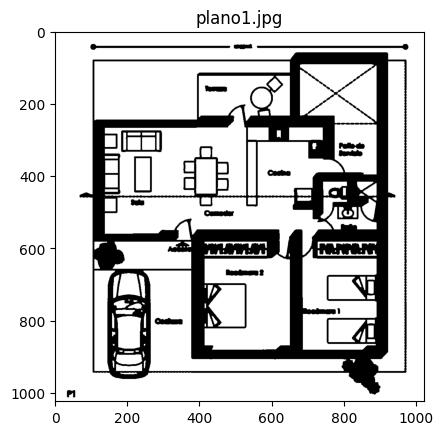

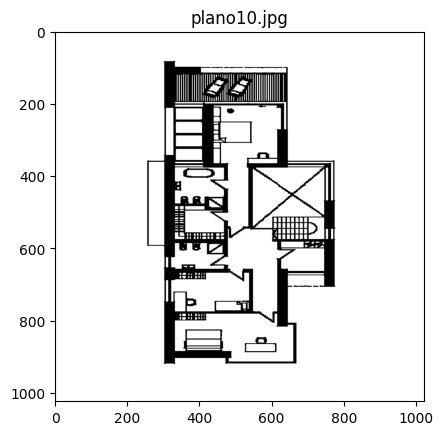

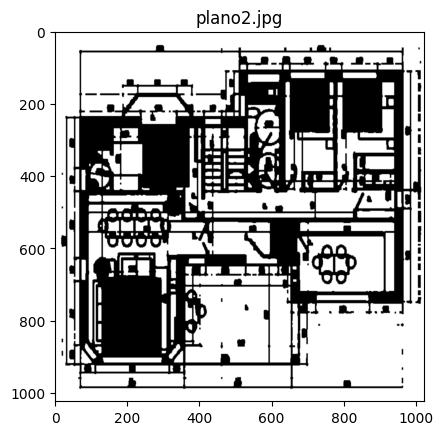

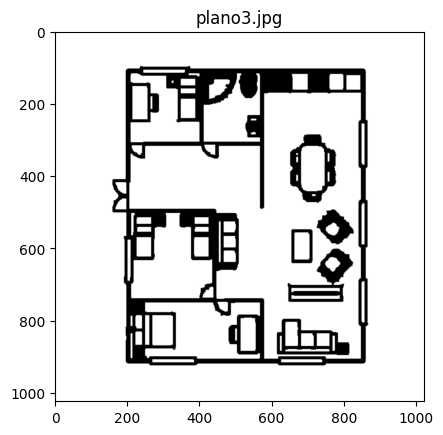

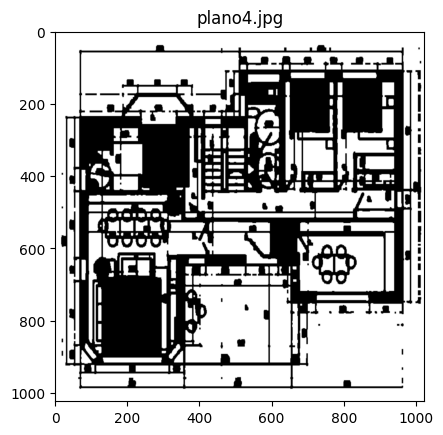

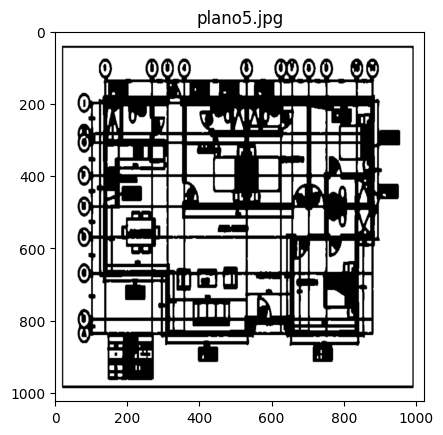

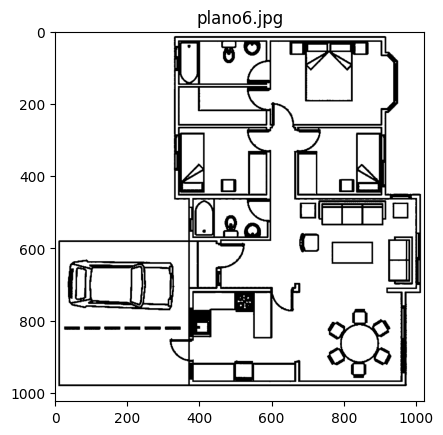

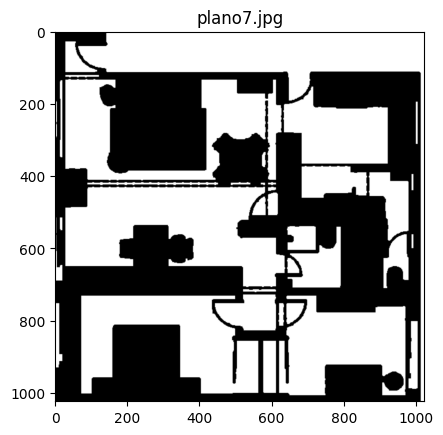

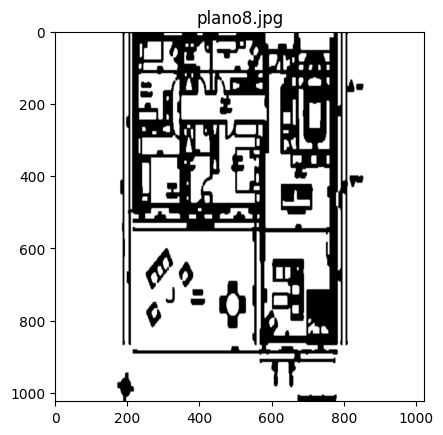

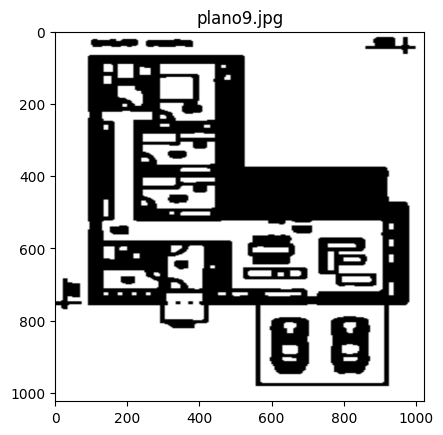

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Ruta de imágenes
ruta = "./images/"
imagenes = []
for nombre in sorted(os.listdir(ruta)):
    img = cv2.imread(os.path.join(ruta, nombre))
    gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Reducción de ruido
    gris = cv2.GaussianBlur(gris, (5, 5), 1)
    # Binarización (Otsu)
    _, binaria = cv2.threshold(gris, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU + cv2.THRESH_OTSU)
    # Dilate/Erode (solo si las líneas lo requieren)
    kernel = np.ones((3, 3), np.uint8)
    binaria = cv2.morphologyEx(binaria, cv2.MORPH_OPEN, kernel, iterations=1)
    binaria = cv2.morphologyEx(binaria, cv2.MORPH_CLOSE, kernel, iterations=1)
    # Redimensión (por ejemplo 1024x1024)
    binaria = cv2.resize(binaria, (1024, 1024))
    imagenes.append(binaria)
    plt.imshow(binaria, cmap='gray')
    plt.title(nombre)
    plt.show()
